# Pace: Plan

In [1]:
# Data Wrangling 
import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from scipy import stats

# Modelling 
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display="diagram")

# Tabulating the results
from tabulate import tabulate

# Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('all_car_adverts.csv')

In [3]:
data.head()

Unnamed: 0 make  model variant  car_price car_badges car_title  \
0           0   AC  Cobra     NaN    89995.0        NaN  AC Cobra   
1           1   AC  Cobra     NaN    92500.0         ''  AC Cobra   
2           2   AC  Cobra     NaN   109995.0         ''  AC Cobra   
3           3   AC  Cobra     NaN   124950.0         ''  AC Cobra   
4           4   AC  Cobra     NaN   124950.0         ''  AC Cobra   

                                       car_sub_title  \
0                                  4.9 MK IV CRS 2dr   
1                                         378 - MkIV   
2  MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...   
3                                       302 MKIV 2dr   
4   302 MKIV With Factory Lightweight Engine 5.0 2dr   

          car_attention_grabber  \
0  GENUINE AC COBRA CRS 522 BHP   
1                 PHYSICAL CAR!   
2       FULL CARBON FIBRE BODY.   
3           ABSOLUTELY STUNNING   
4          'STAGE 3' SVO ENGINE   

                                           car_specs  ... num_owner  ulez  \
0  2001 (X reg), Convertible, 14,400 miles, 4.9L,...  ...       5.0     0   
1  2019 (T reg), Convertible, 650 miles, Manual, ...  ...       NaN     0   
2  2000 (X reg), Convertible, 21,600 miles, 3.5L,...  ...       3.0     0   
3  1989 (F reg), Convertible, 2,750 miles, Manual...  ...       NaN     0   
4  1989 (E reg), Convertible, 15,142 miles, 5.0L,...  ...       NaN     0   

  full_service part_service part_warranty full_dealership  \
0            0            0             0               0   
1            0            0             0               0   
2            0            0             0               0   
3            0            0             0               0   
4            0            0             0               0   

   first_year_road_tax  brand_new  finance_available discounted  
0                    0          0                  0          0  
1                    0          0                  0          0  
2                    0          0                  0          0  
3                    0          0                  0          0  
4                    0          0                  0          0  

[5 rows x 32 columns]

In [4]:
# Shape of the dataset

data.shape

(818456, 32)

# pAce: Analyse 

#### Data Exploration

In the Data Exploration phase, conducted a thorough analysis to uncover patterns, relationships, and insights within the dataset. Key activities included:

••Descriptive Statistics: Calculated summary statistics for each numerical feature, such as mean, median, standard deviation, minimum, and maximum values. This provided a high-level overview of the data distribution and central tendencies.

••Distribution Analysis: Visualized the distributions of key variables (e.g., price, year, miles) using histograms, density and box plots to understand their spread and identify any skewness or kurtosis. This helped in detecting potential outliers and understanding the general data shape.

••Correlation Analysis: Computed correlation coefficients between numerical variables to identify linear relationships. Visualised these correlations using heatmaps and SNS Pairplot, which highlighted significant correlations (e.g., between year and price, miles and price).

••Missing Values Analysis: Identified columns with missing values and calculated the proportion of missing data for each column based on make and model. Visualised missing data patterns using heatmaps to understand the extent and distribution of missingness across the dataset.

••Categorical Data Analysis: Examined the distribution of categorical variables (e.g., make, fuel, transmission) using count plots. This analysis provided insights into the most common categories and their frequencies.

••Outlier Detection: Identified outliers in numerical features by visualising box plots and hist plots. Assessed the potential impact of these outliers on the analysis and modeling process.

These exploratory analyses laid the foundation for subsequent data preparation and modeling steps, ensuring a comprehensive understanding of the dataset and guiding informed decisions throughout the project.

In [5]:
# Looking at the datatypes of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             818456 non-null  int64  
 1   make                   818456 non-null  object 
 2   model                  818153 non-null  object 
 3   variant                816207 non-null  object 
 4   car_price              818456 non-null  float64
 5   car_badges             801459 non-null  object 
 6   car_title              818456 non-null  object 
 7   car_sub_title          817909 non-null  object 
 8   car_attention_grabber  738163 non-null  object 
 9   car_specs              818456 non-null  object 
 10  car_seller             818348 non-null  object 
 11  car_seller_rating      644191 non-null  float64
 12  car_seller_location    816256 non-null  object 
 13  year                   818456 non-null  object 
 14  reg                    747436 non-nu

<Axes: >

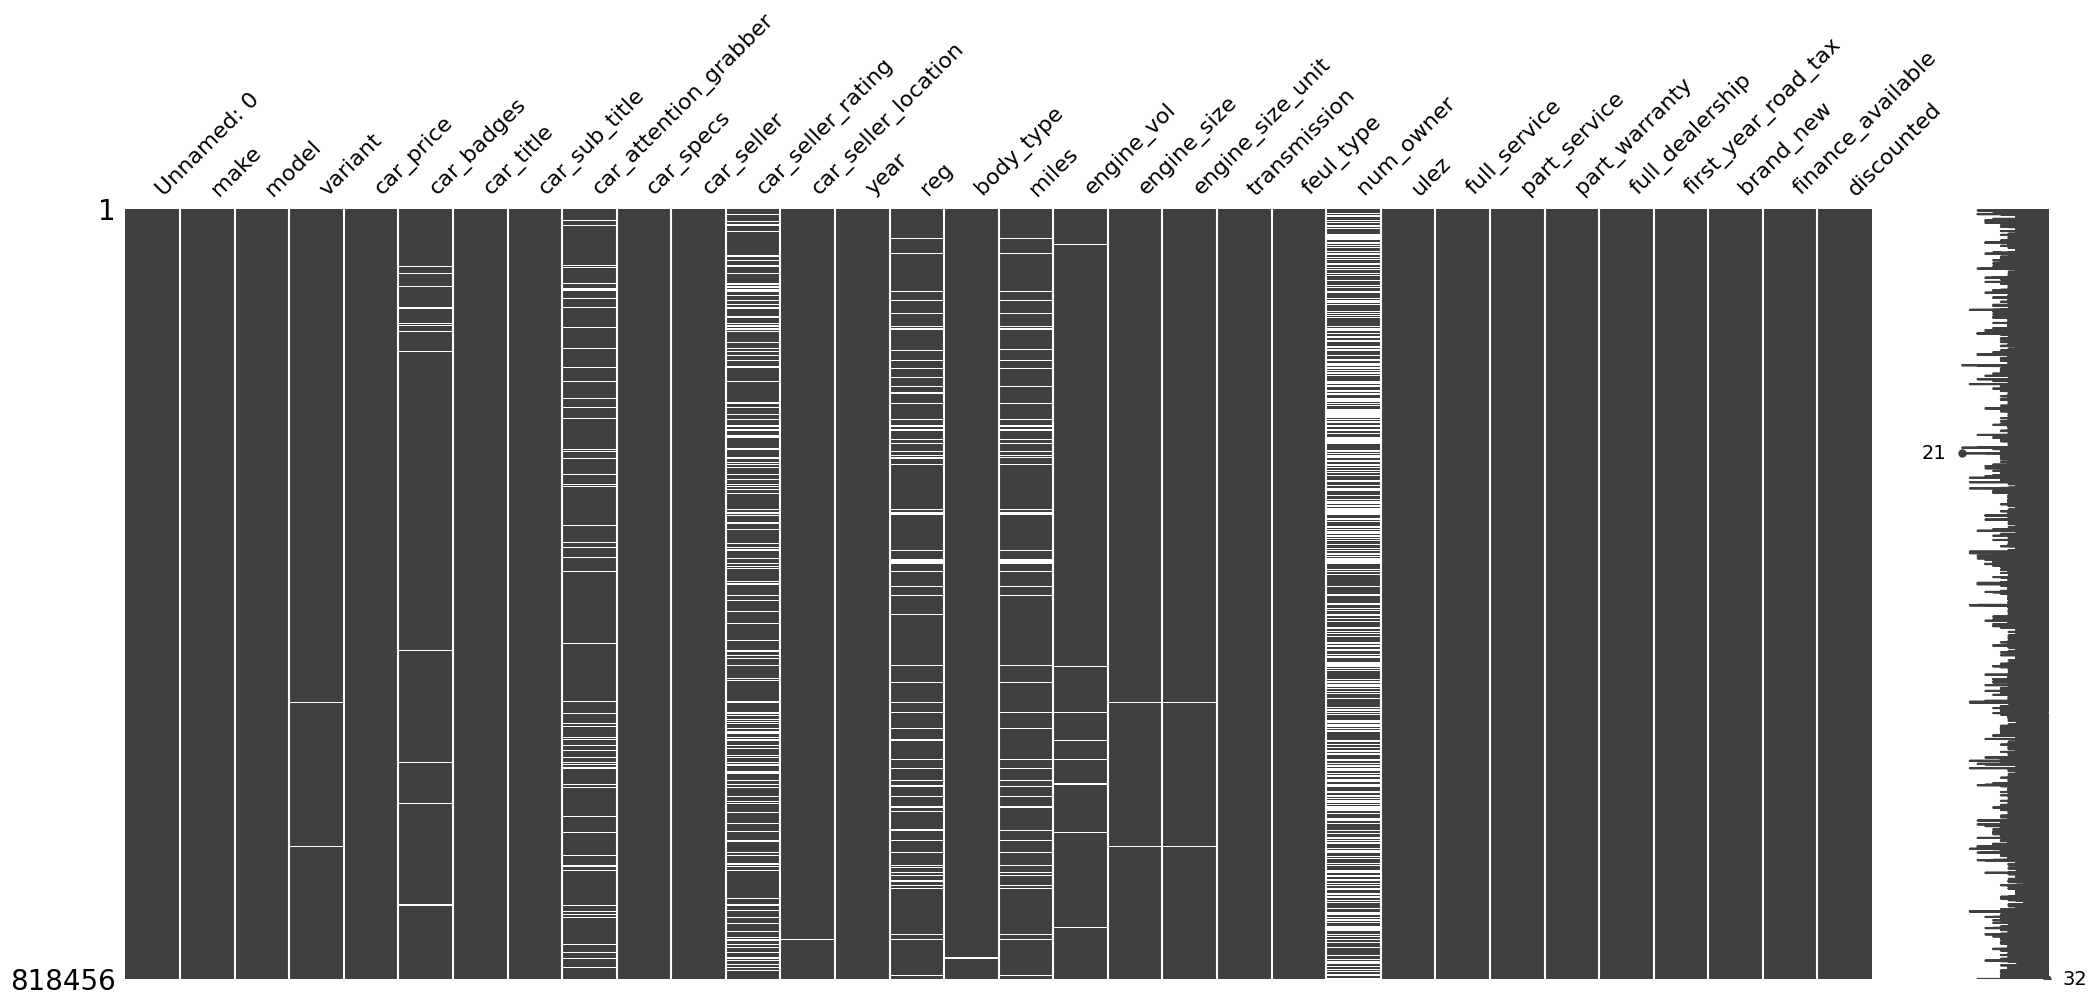

In [6]:
# Visual representation of the missing data in the dataset

missingno.matrix(data)

From the above data, we can see that there are missing values in the folowing columns - variant, car_badges, car_attention_grabber, car_seller_rating, car_seller_location, reg, body_type, miles, engine_vol, engine_size, engine_size_unit, num_owner

### Data Preprocessing 

#### Drop and fill missing values

In [7]:
# Rename the column 'feul_type' to 'fuel_type'
data = data.rename(columns={'feul_type': 'fuel_type'})

In [8]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'year', 'car_title', 'car_specs', 'variant', 'ulez', 'car_badges', 'car_sub_title', 
                    'car_attention_grabber', 'car_seller', 'car_seller_rating', 
                    'car_seller_location', 'reg', 'engine_vol', 'engine_size', 
                    'engine_size_unit', 'num_owner', 'full_service', 'part_service', 
                   'part_warranty', 'full_dealership', 'first_year_road_tax', 
                   'brand_new', 'finance_available', 'discounted']

# Drop the selected columns, ignoring errors if columns are not found
data = data.drop(columns=columns_to_drop)

In [9]:
data.isnull().sum()

make                0
model             303
car_price           0
body_type         712
miles           54753
transmission      213
fuel_type         222
dtype: int64

In [10]:
# Summary statistics of the numerical columns in the dataset

data.describe()

car_price          miles
count  8.184560e+05  763703.000000
mean   2.011859e+04   48735.854328
std    2.224110e+04   36520.141907
min    3.000000e+02       2.000000
25%    8.990000e+03   19441.000000
50%    1.500000e+04   40267.000000
75%    2.450000e+04   71215.500000
max    3.199830e+06  999999.000000

#### drop rows with missing values

In [11]:
# Remove duplicate rows
data = data.drop_duplicates()

In [12]:
data = data.dropna(subset=['model', 'body_type', 'transmission', 'fuel_type'])

In [13]:
data.isnull().sum()

make                0
model               0
car_price           0
body_type           0
miles           17073
transmission        0
fuel_type           0
dtype: int64

In [14]:
data.shape

(455169, 7)

In [15]:
# Calculate the median of the 'miles' column, ignoring missing values
median_miles = data['miles'].median()

# Fill missing values in the 'miles' column with the median
data['miles'] = data['miles'].fillna(median_miles)

In [16]:
data.isnull().sum()

make            0
model           0
car_price       0
body_type       0
miles           0
transmission    0
fuel_type       0
dtype: int64

### Exploratory Data Analysis (EDA)

#### Feature Analysis

#### Distribution Analysis:

Visualised the distributions of key variables (e.g., car_price, year, miles) using histograms, density plots and box plots to understand their spread and identify any skewness or kurtosis. This helped in detecting potential outliers and understanding the general data shape.

In [17]:
numerical_variables = data.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_variables)

['car_price', 'miles']


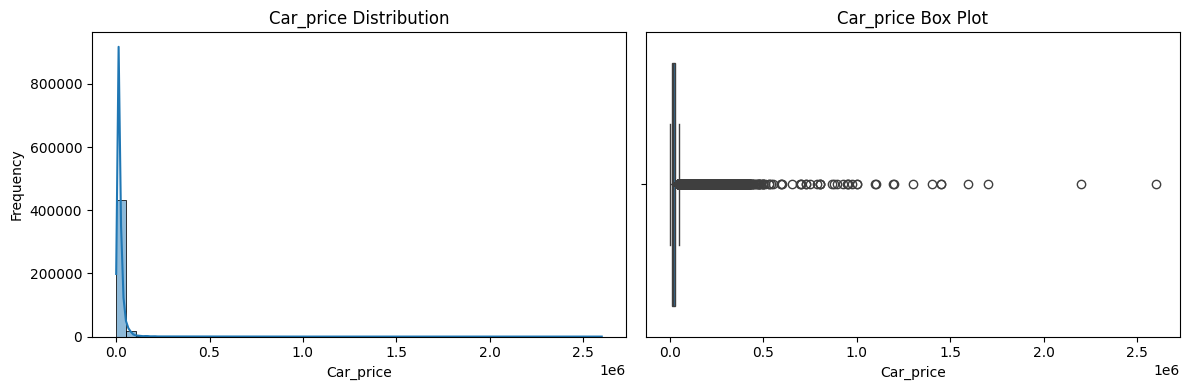

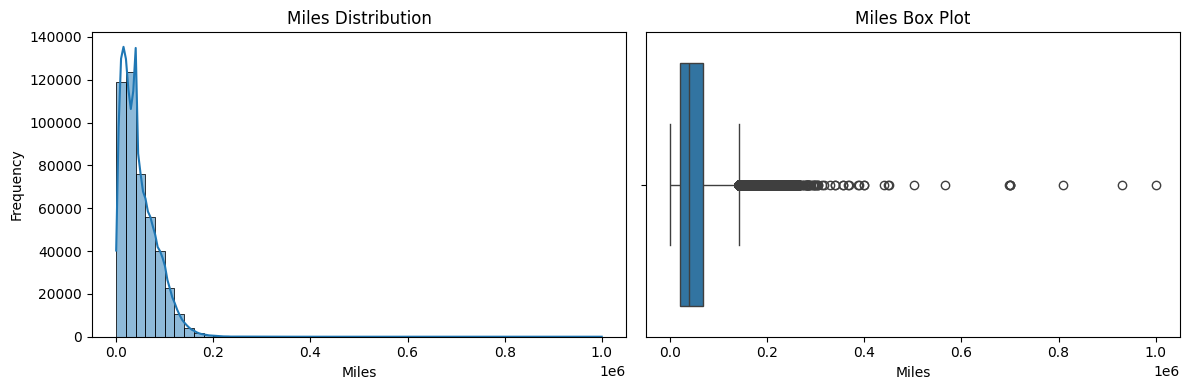

In [18]:
# Loop through each numerical variable and create histograms and density plots
for col in numerical_variables:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(), kde=True, bins=50)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col].dropna())
    plt.title(f'{col.capitalize()} Box Plot')
    plt.xlabel(col.capitalize())
    
    plt.tight_layout()
    plt.show()

The distribution suggest outliers in car_price and miles variables

#### Outlier Detection
Identified outliers in numerical features by visualising box plots and scatter plots. Assessed the potential impact of these outliers on the analysis and modeling process.

Handling Outliers: remove, transforming (e.g., using log transformation), or cap outliers (set a limit on extreme values). Removing Outliers here.

In [19]:
# Function to identify outliers using IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Identify outliers in each feature
outliers_car_price = identify_outliers(data, 'car_price')
outliers_miles = identify_outliers(data, 'miles')

print("Outliers in car_price:\n", outliers_car_price)
print("Outliers in miles:\n", outliers_miles)

Outliers in car_price:
          make  model  car_price    body_type    miles transmission  \
0          AC  Cobra    89995.0  convertible  14400.0       manual   
1          AC  Cobra    92500.0  convertible    650.0       manual   
2          AC  Cobra   109995.0  convertible  21600.0       manual   
3          AC  Cobra   124950.0  convertible   2750.0       manual   
4          AC  Cobra   124950.0  convertible  15142.0       manual   
...       ...    ...        ...          ...      ...          ...   
818421  Volvo   XC90    74800.0          suv   1360.0    automatic   
818422  Volvo   XC90    74900.0          suv   1072.0    automatic   
818423  Volvo   XC90    74900.0          suv   3091.0    automatic   
818425  Volvo   XC90    75995.0          suv  38858.0    automatic   
818429  Volvo   XC90    77190.0          suv  38858.0    automatic   

                    fuel_type  
0                      petrol  
1                      petrol  
2                      petrol  
3      

In [20]:
# Removing outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_cleaned

# Clean the dataset by removing outliers
for feature in ['car_price', 'miles']:
    data = remove_outliers(data, feature)

In [21]:
# Display total rows and columns
total_rows, total_columns = data.shape
print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
data.columns

Total rows: 420030
Total columns: 7


Index(['make', 'model', 'car_price', 'body_type', 'miles', 'transmission',
       'fuel_type'],
      dtype='object')

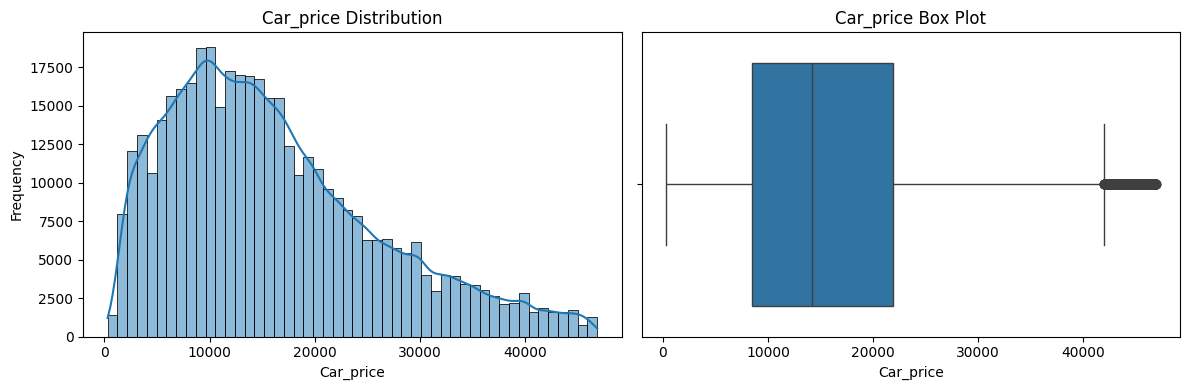

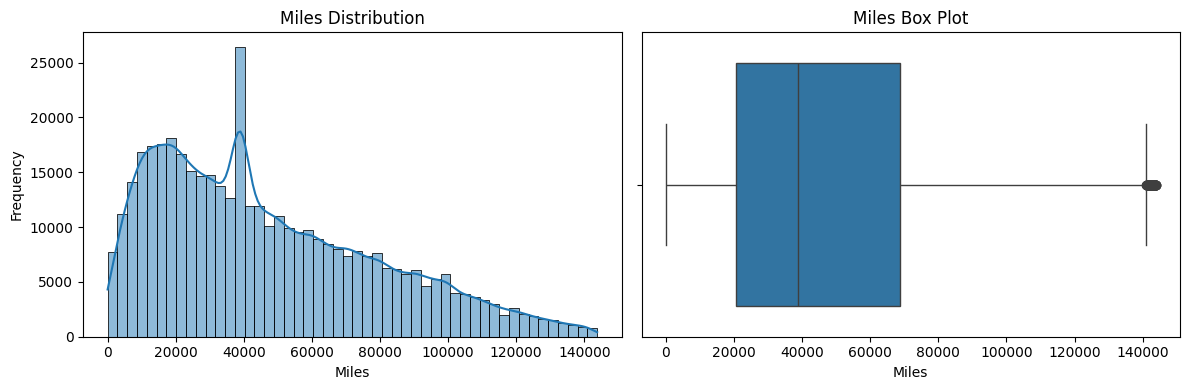

In [22]:
# Plot after outlier removal
# Loop through each numerical variable and create histograms and density plots again after removing outliers
for col in numerical_variables:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(), kde=True, bins=50)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col].dropna())
    plt.title(f'{col.capitalize()} Box Plot')
    plt.xlabel(col.capitalize())
    
    plt.tight_layout()
    plt.show()

In [23]:
# Value counts of the column - Make

make_count = data['make'].value_counts(dropna = False)
make_count

make
Mercedes-Benz    41388
Ford             37081
BMW              33318
Volkswagen       30547
Audi             27350
                 ...  
Piaggio              1
Oldsmobile           1
NG                   1
Locust               1
Zimmer               1
Name: count, Length: 106, dtype: int64

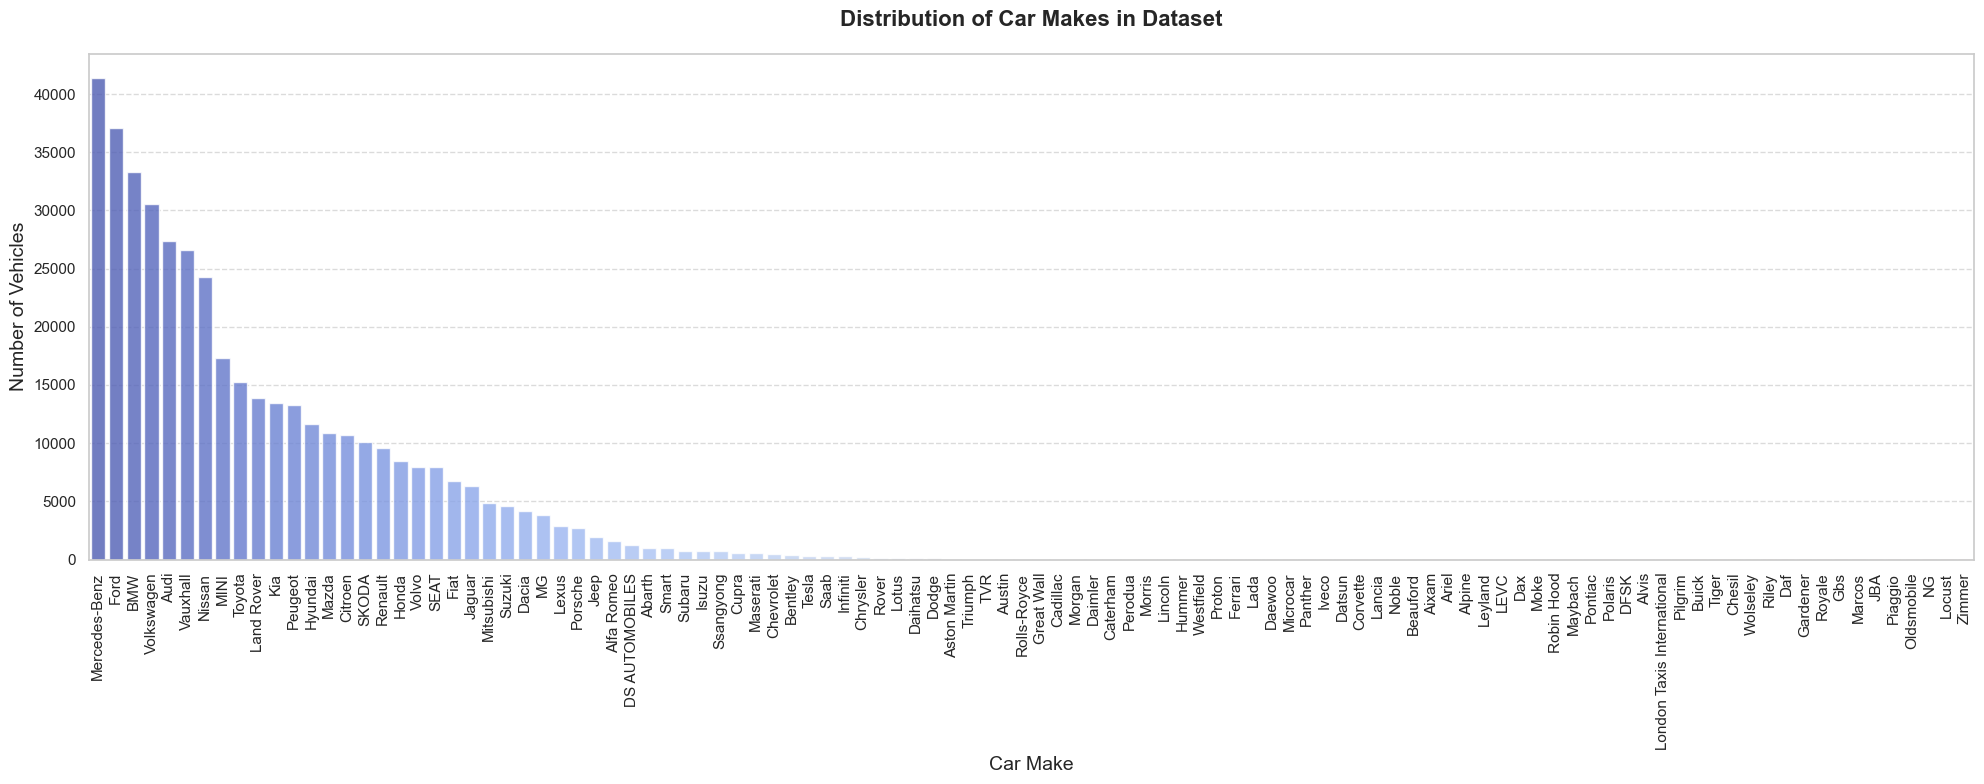

In [24]:
# Bar graph showing the value counts of the column - Make

sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.barplot(x=make_count.index, y=make_count.values, palette="coolwarm", alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('Distribution of Car Makes in Dataset', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xlabel('Car Make', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

From the bar graph we can see that Mercedes-Benz, BMW, Ford, Audi, Volkswagen and Vauxhall are the most common used car make, with a significant drop-off in frequency after these brands. The distribution suggests a focus on certain popular brands, with a wide array of less common makes making up the rest of the dataset. 

In [25]:
# Mean price per each Make 

mean_price_make = data[['make', 'car_price']].groupby('make', as_index = False).mean()
mean_price_make

make     car_price
0        Abarth  14424.783047
1         Aixam   4873.250000
2    Alfa Romeo  15966.389776
3        Alpine  45246.250000
4         Alvis  21495.000000
..          ...           ...
101  Volkswagen  16668.187776
102       Volvo  22033.734443
103   Westfield  12865.625000
104    Wolseley   3495.000000
105      Zimmer  27999.000000

[106 rows x 2 columns]

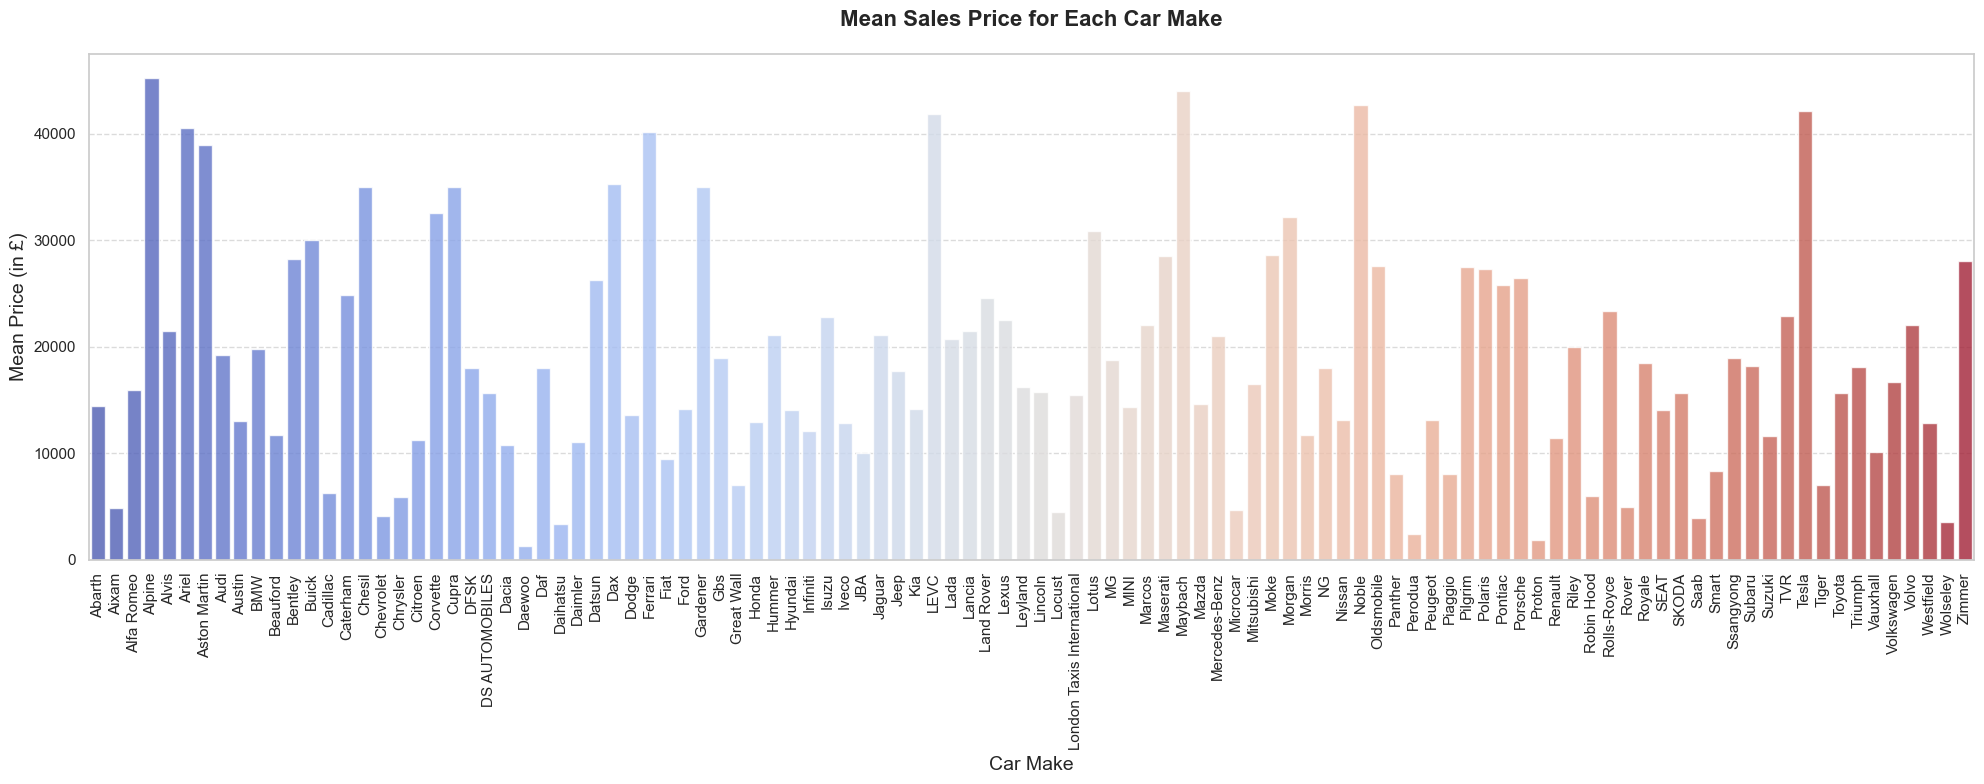

In [26]:
## Mean Price for each Make

# Set the style for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.barplot(x=mean_price_make['make'], y=mean_price_make['car_price'], palette="coolwarm", alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('Mean Sales Price for Each Car Make', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Mean Price (in £)', fontsize=14)
plt.xlabel('Car Make', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


The bar chart displays the average sales prices of various car makes. Most brands have relatively low mean prices, while a few luxury brands, like Ferrari, maybach, stand out with higher averages. The chart highlights the broad range of car prices across different brands, from economy to luxury vehicles.

In [27]:
# Value counts of the column - Body_type

vehicle_count = data['body_type'].value_counts(dropna = True)
vehicle_count

body_type
hatchback                162173
suv                      139443
saloon                    33250
estate                    22448
convertible               17976
coupe                     17527
mpv                       16358
pickup                     7745
combi van                  2127
minibus                     446
car derived van             355
camper                      120
limousine                    29
panel van                    27
window van                    3
pickup double cab car         2
hearse                        1
Name: count, dtype: int64

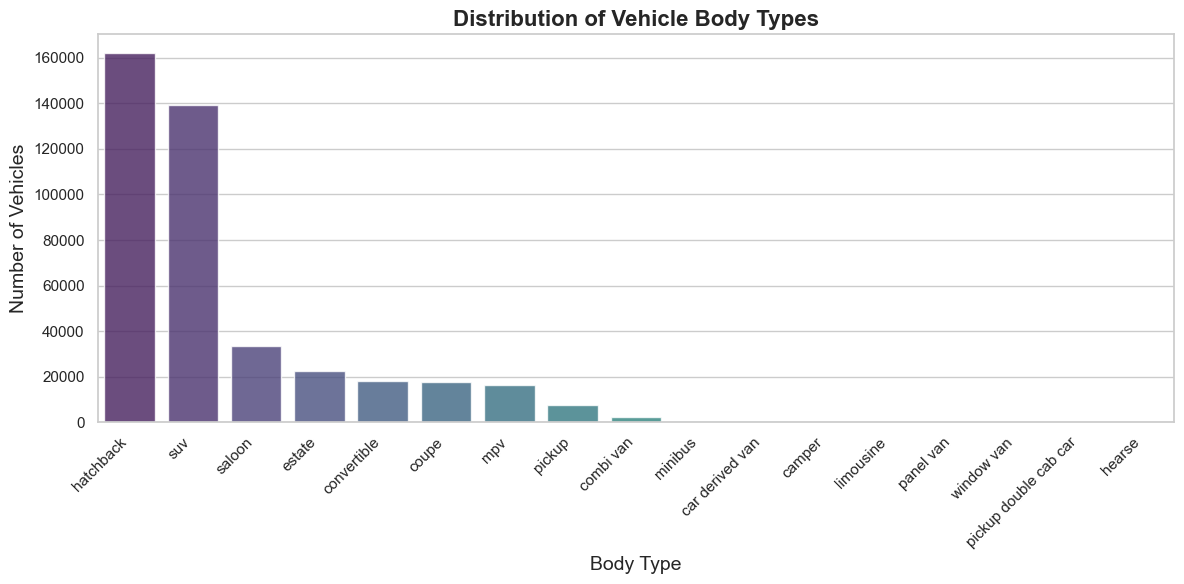

In [28]:
# Bar graph showing the value counts of the column - Body_type

# Setting a style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_count.index, y=vehicle_count.values, palette="viridis", alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Vehicle Body Types', fontsize=16, fontweight='bold')
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xlabel('Body Type', fontsize=14)

# Improve layout and display the plot
plt.tight_layout() 
plt.show()

In [29]:
# Mean price per each Body type

mean_price_body_type = data[['body_type', 'car_price']].groupby('body_type', as_index = False).mean()
mean_price_body_type

body_type     car_price
0                  camper  28496.883333
1         car derived van   8563.445070
2               combi van  25878.716972
3             convertible  15100.724633
4                   coupe  20141.652993
5                  estate  16600.824305
6               hatchback  12264.427284
7                  hearse   3000.000000
8               limousine  10850.068966
9                 minibus  31211.538117
10                    mpv  11524.339284
11              panel van  20507.888889
12                 pickup  23613.048160
13  pickup double cab car  40350.000000
14                 saloon  18389.282316
15                    suv  19596.654454
16             window van  20663.333333

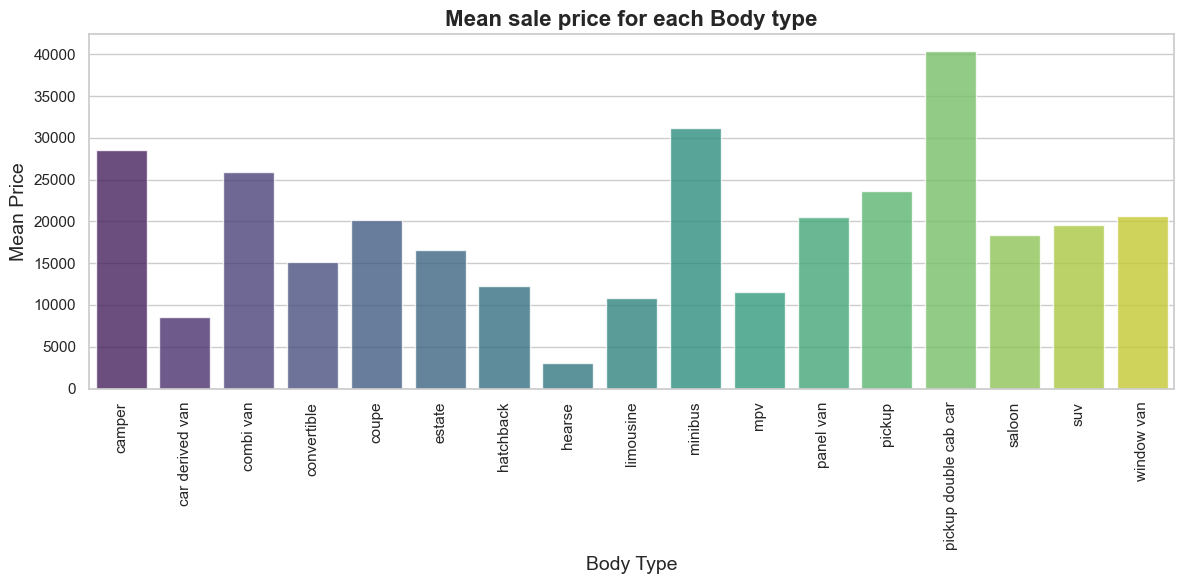

In [30]:
# Mean Price for each body_type

# Setting a style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_price_body_type['body_type'], y=mean_price_body_type['car_price'], palette="viridis", alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('Mean sale price for each Body type', fontsize=16, fontweight='bold')
plt.ylabel('Mean Price', fontsize=14)
plt.xlabel('Body Type', fontsize=14)

# Improve layout and display the plot
plt.tight_layout() 
plt.show()

From the graph, we can see the distribution of the average car price by body type

In [31]:
# Visualise the distribution of the Fuel_type column 

# Prepare the data for plotting
fuel_data = pd.DataFrame(data['fuel_type'].value_counts()).reset_index()
fuel_data.columns = ['fuel_type', 'index']

# Create a pie chart using Plotly Express
fig = px.pie(fuel_data, names='fuel_type', values='index', color_discrete_sequence=px.colors.sequential.Cividis)

# Display the pie chart
fig.show()

In [32]:
# Visualise the distribution of the Transmission column 

# Prepare the data for plotting
transmission_data = pd.DataFrame(data['transmission'].value_counts()).reset_index()
transmission_data.columns = ['transmission', 'index']

# Create a pie chart using Plotly Express
fig = px.pie(transmission_data, names='transmission', values='index', color_discrete_sequence=px.colors.sequential.Cividis)

# Display the pie chart
fig.show()

In [33]:
# Correlation Analysis of Numerical Variables
data.cov(numeric_only=True)

car_price         miles
car_price  1.003067e+08 -1.708731e+08
miles     -1.708731e+08  1.059096e+09

In [34]:
data.corr(numeric_only=True)

car_price     miles
car_price   1.000000 -0.524253
miles      -0.524253  1.000000

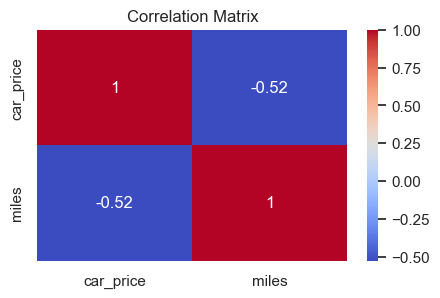

In [35]:
# Visualize correlations
plt.figure(figsize=(5, 3))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Interpretation: Correlation:

Moderate negative correlation (-0.52) between price and miles, suggesting that higher prices correlate with lower miles readings.

# paCe: Construct

Since Car Price Prediction is a regression problem, we will need to use a regression model, to train on our model to make predictions. I have chosen the following regression models for the job:

Linear Regression
Ridge Regression
Lasso Regression

In this section, I will fit the models to the training set as outlined above and evaluate their Root Mean Squared Error (RMSE), R-squared at making predictions. Then, we will select the best model based on those values.

### Feature Encoding/Engineering

In [36]:
# Combine 'make' and 'model' into a new column 'make_model'
data['make_model'] = data['make'] + ' ' + data['model']

# Drop the original 'make' and 'model' columns if no longer needed
data = data.drop(columns=['make', 'model'])

We combined the columns 'make' and 'model', making a single column 'make_model'. Next we begin feature engineering in both categorical and numerical columns

In [37]:
# Apply log transformation to the 'miles' and 'car_price' column
#data['miles'] = np.log1p(data['miles'])
#data['car_price'] = np.log1p(data['car_price'])

In [38]:
# Convert all boolean columns to integers (0 and 1)
#boolean_columns = data.select_dtypes(include=['bool']).columns
#data[boolean_columns] = data[boolean_columns].astype(int)

#### Split data into training and test sets

In [39]:
#FEATURE SELECTION
# Split data into features and target variable
X = data.drop(columns=['car_price'])
y = data['car_price']

In [40]:
X

body_type    miles transmission fuel_type            make_model
8       convertible  10313.0    automatic    petrol     Abarth 124 Spider
10      convertible  11500.0    automatic    petrol     Abarth 124 Spider
11      convertible  28692.0       manual    petrol     Abarth 124 Spider
12      convertible  44000.0       manual    petrol     Abarth 124 Spider
13      convertible  58000.0       manual    petrol     Abarth 124 Spider
...             ...      ...          ...       ...                   ...
818449  convertible   2800.0       manual    petrol         Westfield Sei
818450  convertible  17600.0       manual    petrol         Westfield Sei
818451  convertible   5000.0       manual    petrol       Westfield Sport
818452       saloon  56000.0       manual    petrol         Wolseley 1500
818455        coupe  38000.0    automatic    petrol  Zimmer Golden Spirit

[420030 rows x 5 columns]

In [41]:
y

8         24275.0
10        25000.0
11        15649.0
12        15995.0
13        16195.0
           ...   
818449    12995.0
818450    16500.0
818451     8595.0
818452     3495.0
818455    27999.0
Name: car_price, Length: 420030, dtype: float64

In [42]:
# Split the data into train and test sets (80% train, 20% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Display the sizes of the datasets
print(f'Training set: {X_train.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')

Training set: 336024 samples
Test set: 84006 samples


In [44]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()

In [45]:
y_train = y_train.sort_index()
y_test = y_test.sort_index()

### Feature Engineering:

Selecting, manipulating and transforming raw data into features that can be used in supervised learning.

#### Preprocessor

Target Encoder for Categorical Features (make_model)
Using Target Encoding (encoding categorical variables with the average target value) for make_model.

Advantages:
Preserves Information: preserves the individual information of each make and model, albeit in a transformed numerical form.

Capture Price Trends: By encoding with the average price, it directly capture the average price tendency associated with each manufacturer and model, which can be crucial for price prediction tasks.

Works with High Cardinality: Make and model often have high cardinality (many unique values), and Target Encoding can handle this well without creating too many additional columns, unlike One-Hot Encoding.

In [46]:
# Columns to be target encoded
target_enc_features = ['make_model']

# Initialize TargetEncoder
te = TargetEncoder(cols=target_enc_features)

# Fit and transform on training data
X_train_te = te.fit_transform(X_train[target_enc_features], y_train)
X_train_te = X_train_te.sort_index()

# Transform test data using fitted encoder
X_test_te = te.transform(X_test[target_enc_features]).sort_index()
X_train_te = X_train_te.sort_index()
X_train_te

make_model
8       19377.545388
10      19377.545388
12      19377.545388
13      19377.545388
14      19377.545388
...              ...
818449  15715.863306
818450  15715.863306
818451  15163.618055
818452  14500.064836
818455  17688.242892

[336024 rows x 1 columns]

In [47]:
# Drop original columns and concatenate the encoded columns
X_train_combined = X_train.drop(columns=target_enc_features).sort_index()
X_test_combined = X_test.drop(columns=target_enc_features).sort_index()

# Concatenate encoded columns
X_train_combined = pd.concat([X_train_combined, X_train_te], axis=1).sort_index()
X_test_combined = pd.concat([X_test_combined, X_test_te], axis=1).sort_index()
X_train_combined.shape, X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336024 entries, 8 to 818455
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   body_type     336024 non-null  object 
 1   miles         336024 non-null  float64
 2   transmission  336024 non-null  object 
 3   fuel_type     336024 non-null  object 
 4   make_model    336024 non-null  float64
dtypes: float64(2), object(3)
memory usage: 15.4+ MB


((336024, 5), None)

Target Encoder Considerations:

• Data Size and Distribution: Ensuring enough data points for each make and model to calculate reliable average prices as small sample sizes can lead to biased estimates.

• Validation Strategy: When using Target Encoding, it's crucial to compute average prices using only the training data to avoid data leakage. Fit the encoder on the training set and transform both the training and test sets consistently.

• Impact on Model Performance: Validate whether the encoded features improve model performance (e.g., using cross-validation or a separate validation set). Sometimes, simpler encoding methods might suffice depending on your dataset and model.

#### One Hot Encoder for Categorical Variables (fuel_type, transmission, body_type)

Encode nominal categorical features using OneHotEncoder, ignoring unknown categories.

In [48]:
X_train_combined

body_type    miles transmission fuel_type    make_model
8       convertible  10313.0    automatic    petrol  19377.545388
10      convertible  11500.0    automatic    petrol  19377.545388
12      convertible  44000.0       manual    petrol  19377.545388
13      convertible  58000.0       manual    petrol  19377.545388
14      convertible  28692.0       manual    petrol  19377.545388
...             ...      ...          ...       ...           ...
818449  convertible   2800.0       manual    petrol  15715.863306
818450  convertible  17600.0       manual    petrol  15715.863306
818451  convertible   5000.0       manual    petrol  15163.618055
818452       saloon  56000.0       manual    petrol  14500.064836
818455        coupe  38000.0    automatic    petrol  17688.242892

[336024 rows x 5 columns]

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns for label encoding
categorical_features = ['body_type', 'transmission', 'fuel_type']  # Modify this according to your dataset

# Apply label encoding to each categorical column
for col in categorical_features:
    X_train_combined[col] = label_encoder.fit_transform(X_train_combined[col])
    X_test_combined[col] = label_encoder.transform(X_test_combined[col])

    
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply encoding to categorical features
X_train_combined[categorical_features] = ordinal_encoder.fit_transform(X_train_combined[categorical_features])
X_test_combined[categorical_features] = ordinal_encoder.transform(X_test_combined[categorical_features])

# Check the updated DataFrame
X_train_combined.head()
X_test_combined.head()

body_type    miles  transmission  fuel_type    make_model
11        3.0  28692.0           1.0        6.0  19377.545388
16        3.0  61000.0           1.0        6.0  19377.545388
20        3.0  35768.0           1.0        6.0  19377.545388
33        3.0  38600.0           1.0        6.0  19377.545388
39        3.0  29000.0           1.0        6.0  19377.545388

#### Standard Scaler and Polynomial Transformation

In [50]:
poly_features = ['miles', 'make_model']

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Scale the features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Step 2: Create polynomial features
])

In [51]:
X_train_xd = pipeline.fit_transform(X_train_combined[poly_features], y_train)
X_train_xd

array([[-1.12994721,  0.47311223,  1.27678071, -0.53459185,  0.22383518],
       [-1.09346089,  0.47311223,  1.19565672, -0.51732972,  0.22383518],
       [-0.09446726,  0.47311223,  0.00892406, -0.04469361,  0.22383518],
       ...,
       [-1.29325962, -0.14637236,  1.67252045,  0.18929747,  0.02142487],
       [ 0.27439193, -0.24392056,  0.07529093, -0.06692983,  0.05949724],
       [-0.27889685,  0.22476982,  0.07778345, -0.06268759,  0.05052147]])

In [52]:
X_test_xd = pipeline.transform(X_test_combined[poly_features])
X_test_xd

array([[-0.56500863,  0.47311223,  0.31923475, -0.26731249,  0.22383518],
       [ 0.42808326,  0.47311223,  0.18325528,  0.20253143,  0.22383518],
       [-0.34750466,  0.47311223,  0.12075949, -0.1644087 ,  0.22383518],
       ...,
       [ 2.36468622,  1.73995116,  5.5917409 ,  4.11443852,  3.02743003],
       [ 0.27439193,  1.73995116,  0.07529093,  0.47742856,  3.02743003],
       [ 0.08996234,  1.73995116,  0.00809322,  0.15653007,  3.02743003]])

In [53]:
# Get feature names from polynomial transformation
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(input_features=poly_features)

In [54]:
poly_feature_names

array(['miles', 'make_model', 'miles^2', 'miles make_model',
       'make_model^2'], dtype=object)

In [55]:
# Convert transformed data to DataFrame with correct column names
X_train_xd_df = pd.DataFrame(X_train_xd, columns=poly_feature_names)
X_test_xd_df = pd.DataFrame(X_test_xd, columns=poly_feature_names)
X_train_xd_df

miles  make_model   miles^2  miles make_model  make_model^2
0      -1.129947    0.473112  1.276781         -0.534592      0.223835
1      -1.093461    0.473112  1.195657         -0.517330      0.223835
2      -0.094467    0.473112  0.008924         -0.044694      0.223835
3       0.335868    0.473112  0.112808          0.158903      0.223835
4      -0.565009    0.473112  0.319235         -0.267312      0.223835
...          ...         ...       ...               ...           ...
336019 -1.360884   -0.065187  1.852005          0.088713      0.004249
336020 -0.905957   -0.065187  0.820759          0.059057      0.004249
336021 -1.293260   -0.146372  1.672520          0.189297      0.021425
336022  0.274392   -0.243921  0.075291         -0.066930      0.059497
336023 -0.278897    0.224770  0.077783         -0.062688      0.050521

[336024 rows x 5 columns]

In [56]:
X_train_xd_df.index = X_train_combined.index
X_test_xd_df.index = X_test_combined.index
X_train_xd_df

miles  make_model   miles^2  miles make_model  make_model^2
8      -1.129947    0.473112  1.276781         -0.534592      0.223835
10     -1.093461    0.473112  1.195657         -0.517330      0.223835
12     -0.094467    0.473112  0.008924         -0.044694      0.223835
13      0.335868    0.473112  0.112808          0.158903      0.223835
14     -0.565009    0.473112  0.319235         -0.267312      0.223835
...          ...         ...       ...               ...           ...
818449 -1.360884   -0.065187  1.852005          0.088713      0.004249
818450 -0.905957   -0.065187  0.820759          0.059057      0.004249
818451 -1.293260   -0.146372  1.672520          0.189297      0.021425
818452  0.274392   -0.243921  0.075291         -0.066930      0.059497
818455 -0.278897    0.224770  0.077783         -0.062688      0.050521

[336024 rows x 5 columns]

In [57]:

X_train_combined

body_type    miles  transmission  fuel_type    make_model
8             3.0  10313.0           0.0        6.0  19377.545388
10            3.0  11500.0           0.0        6.0  19377.545388
12            3.0  44000.0           1.0        6.0  19377.545388
13            3.0  58000.0           1.0        6.0  19377.545388
14            3.0  28692.0           1.0        6.0  19377.545388
...           ...      ...           ...        ...           ...
818449        3.0   2800.0           1.0        6.0  15715.863306
818450        3.0  17600.0           1.0        6.0  15715.863306
818451        3.0   5000.0           1.0        6.0  15163.618055
818452       14.0  56000.0           1.0        6.0  14500.064836
818455        4.0  38000.0           0.0        6.0  17688.242892

[336024 rows x 5 columns]

In [58]:
# Drop original columns and concatenate the encoded columns
X_train_fx = X_train_combined.drop(columns=poly_features).sort_index()
X_test_fx = X_test_combined.drop(columns=poly_features).sort_index()
X_train_fx

body_type  transmission  fuel_type
8             3.0           0.0        6.0
10            3.0           0.0        6.0
12            3.0           1.0        6.0
13            3.0           1.0        6.0
14            3.0           1.0        6.0
...           ...           ...        ...
818449        3.0           1.0        6.0
818450        3.0           1.0        6.0
818451        3.0           1.0        6.0
818452       14.0           1.0        6.0
818455        4.0           0.0        6.0

[336024 rows x 3 columns]

In [59]:
# Concatenate encoded columns
X_train_fx = pd.concat([X_train_fx, X_train_xd_df], axis=1).sort_index()
X_test_fx = pd.concat([X_test_fx, X_test_xd_df], axis=1).sort_index()
X_train_fx

body_type  transmission  fuel_type     miles  make_model   miles^2  \
8             3.0           0.0        6.0 -1.129947    0.473112  1.276781   
10            3.0           0.0        6.0 -1.093461    0.473112  1.195657   
12            3.0           1.0        6.0 -0.094467    0.473112  0.008924   
13            3.0           1.0        6.0  0.335868    0.473112  0.112808   
14            3.0           1.0        6.0 -0.565009    0.473112  0.319235   
...           ...           ...        ...       ...         ...       ...   
818449        3.0           1.0        6.0 -1.360884   -0.065187  1.852005   
818450        3.0           1.0        6.0 -0.905957   -0.065187  0.820759   
818451        3.0           1.0        6.0 -1.293260   -0.146372  1.672520   
818452       14.0           1.0        6.0  0.274392   -0.243921  0.075291   
818455        4.0           0.0        6.0 -0.278897    0.224770  0.077783   

        miles make_model  make_model^2  
8              -0.534592      0.223835  
10             -0.517330      0.223835  
12             -0.044694      0.223835  
13              0.158903      0.223835  
14             -0.267312      0.223835  
...                  ...           ...  
818449          0.088713      0.004249  
818450          0.059057      0.004249  
818451          0.189297      0.021425  
818452         -0.066930      0.059497  
818455         -0.062688      0.050521  

[336024 rows x 8 columns]

### Modeling

In the Modeling phase, aimed to develop a robust predictive model to forecast used car prices based on the cleaned and transformed dataset. Key steps and considerations include:

• Model Selection: Evaluated various regression models suitable for predicting continuous variables, such as Linear, Ridge, Lasso, Elastic Regression. Each model was selected based on its ability to handle the dataset's characteristics, interpretability, and potential for achieving high prediction accuracy.

• Model Training: The selected models were trained using the training dataset, which was prepared during the data preparation phase. Parameters were tuned using techniques like grid search combined with cross-validation to optimize model performance and prevent overfitting.

In [60]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [61]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_fx, y_train)
    y_pred = model.predict(X_test_fx)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 5215.9468, R2 = 0.7290
Ridge Regression: RMSE = 5215.9470, R2 = 0.7290
Lasso Regression: RMSE = 5215.9633, R2 = 0.7290
Elastic Net Regression: RMSE = 5970.8218, R2 = 0.6448


Linear Regression has the best performance among the four models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics. Similar output from Ridge and Lasso, which can further be evaluated for different alphas.

• RMSE (Root Mean Squared Error) = 5215.9468: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 5215.9468 units from the actual values of the car price.

• R2 (R-squared) = 0.7290: This value indicates that approximately 72.90% of the variance in the target variable (car_price) is explained by the features in the model. While this is a good level of explanation, it indicates that there is still about 27.10% of unexplained variance, suggesting room for model improvement.

### Evaluation

In the Evaluation phase, assessed the performance of the trained models to ensure they met the project objectives and business requirements:

• Metrics: Used several evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to quantify the accuracy of predictions. These metrics provided insights into how well the models predicted used car prices compared to actual values.

• Validation: The models were validated using the test dataset, which was set aside during the data preparation phase. This step ensured that the models generalized well to unseen data and avoided overfitting to the training dataset.

#### VIF - measure the multicollinearity in the independent features

Variance Inflation Factor (VIF) is a measure of multicollinearity in a set of regression variables. It quantifies how much the variance of a regression coefficient is inflated due to collinearity with other predictors. A VIF value above 10 is generally considered an indication of high multicollinearity, though in practice, even lower values can be problematic depending on the context and specific requirements of the model.

In [62]:
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog] #First column is excluded from this list which becomes y in next step
    X, y = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X,y).score(X,y) 
    #.score(X, y) computes the 𝑅 square value for the fitted model, which measures the proportion of variance in y explained by X.

    # calc the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF":vif_dict})

In [63]:
vif_data = vif(X_train_fx.columns, X_train_fx).sort_values(by = 'VIF', ascending = False)
vif_data

VIF
make_model        2.011421
miles             1.682415
make_model^2      1.478536
miles^2           1.470820
transmission      1.296970
fuel_type         1.252112
body_type         1.208229
miles make_model  1.094340

### Cross Validation and Hyperparameter Tuning

In [64]:
# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train_fx, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train_fx, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train_fx, y_train)
    y_pred = model.predict(X_test_fx)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 5255.2457
Best Ridge: {'alpha': 100.0}, RMSE = 5284.6020
Best Lasso: {'alpha': 10.0}, RMSE = 5284.4723

Evaluate the best models on the test set
Linear Regression: RMSE = 5215.9468, R2 = 0.7290
Ridge: RMSE = 5215.9679, R2 = 0.7290
Lasso: RMSE = 5216.1909, R2 = 0.7289


The performance remains unchanged as expected since Linear Regression does not have hyperparameters to tune. It serves as a baseline for comparison.

Based on the post-tuning metrics, Linear Regression is the best performing model with the lowest RMSE and highest R2 score, making it the preferred choice for predicting UK used car prices in this context.

#### Best Model: Linear Regression with cross-validation

In [65]:
# Initialize the linear regression model
model = LinearRegression()

In [66]:
# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect coefficients
coefficients = []
scores = []

for train_index, test_index in kf.split(X_train_fx):
    X_train_fold, X_test_fold = X_train_fx.iloc[train_index], X_train_fx.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    coefficients.append(model.coef_)
    scores.append(model.score(X_test_fold, y_test_fold))

# Convert list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=X_train_fx.columns)

# Evaluate coefficients (e.g., mean and standard deviation across folds)
coefficients_mean = coefficients_df.mean()
coefficients_std = coefficients_df.std()

print("Coefficients mean:")
print(coefficients_mean)
print("\nCoefficients standard deviation:")
print(coefficients_std)

# Evaluate scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print("\nMean cross-validation score:", mean_score)
print("Standard deviation of cross-validation score:", std_score)

Coefficients mean:
body_type            -16.865894
transmission       -4401.898444
fuel_type            -58.117320
miles              -5011.078502
make_model          5285.839735
miles^2              482.584821
miles make_model    -838.917042
make_model^2           3.837279
dtype: float64

Coefficients standard deviation:
body_type            1.160322
transmission        11.693720
fuel_type            1.957789
miles                3.213068
make_model           7.460120
miles^2              3.104215
miles make_model     4.237233
make_model^2         5.496931
dtype: float64

Mean cross-validation score: 0.725731273253697
Standard deviation of cross-validation score: 0.0016382547196553817


In [67]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

Actual     Predicted
11  15649.0  19363.730119
16  16950.0  13956.796645
20  17749.0  18100.489921
33  18599.0  17607.328502
39  18995.0  19307.821830

### Model Predictions

In [68]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire training dataset
model.fit(X_train_fx, y_train)

# Predict on the test dataset
y_pred = model.predict(X_test_fx)

In [69]:
model.coef_

array([-1.68636552e+01, -4.40189442e+03, -5.81130552e+01, -5.01107231e+03,
        5.28583521e+03,  4.82574279e+02, -8.38913513e+02,  3.84601444e+00])

In [70]:
model.intercept_

18446.35348503624

In [71]:
model.feature_names_in_

array(['body_type', 'transmission', 'fuel_type', 'miles', 'make_model',
       'miles^2', 'miles make_model', 'make_model^2'], dtype=object)

In [72]:
model_coef = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Coef': model.coef_
})
model_coef.sort_values(by='Coef', ascending=False)

Feature         Coef
4        make_model  5285.835214
5           miles^2   482.574279
7      make_model^2     3.846014
0         body_type   -16.863655
2         fuel_type   -58.113055
6  miles make_model  -838.913513
1      transmission -4401.894419
3             miles -5011.072309

     Actual     Predicted
11  15649.0  19356.449562
16  16950.0  13920.215688
20  17749.0  18084.415015
33  18599.0  17588.107444
39  18995.0  19300.130724


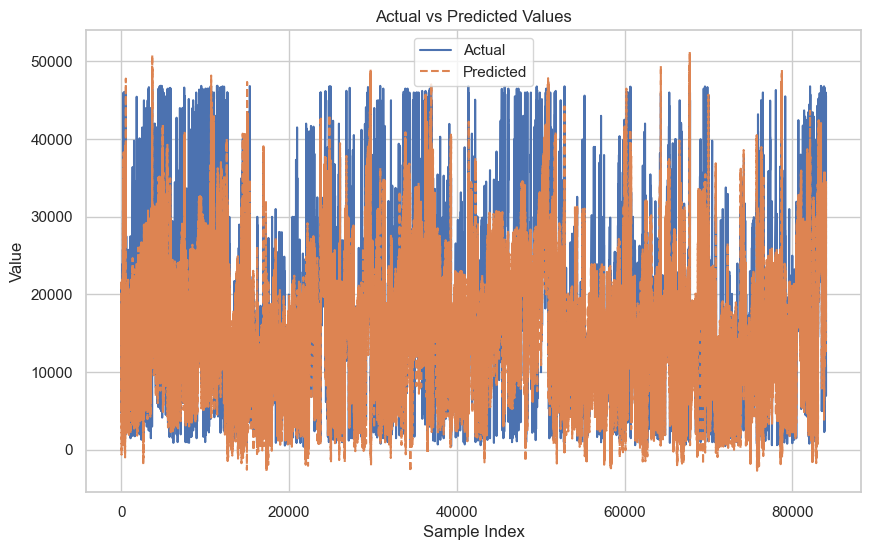

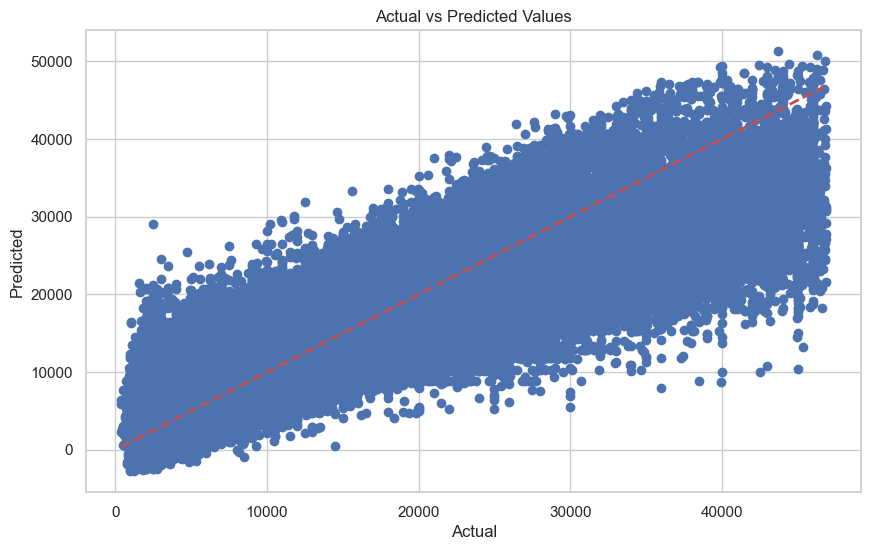

In [73]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison
print(comparison_df.head())

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual')
plt.plot(comparison_df['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Scatter plot for better visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#### Interpret the Model - Permutation Importance

In [74]:
from sklearn.inspection import permutation_importance

In [75]:
perm_importance = permutation_importance(model, X_test_fx, y_test, n_repeats=10, random_state=42)

In [76]:
# Feature names
feature_names = X_test_fx.columns.tolist()

# Mean importances over repeats
mean_importance = perm_importance.importances_mean

# Combine feature names and importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.sort_values(by='Importance', ascending=False)

Feature  Importance
4        make_model    0.555366
3             miles    0.504190
1      transmission    0.095983
6  miles make_model    0.013316
5           miles^2    0.007963
2         fuel_type    0.000421
0         body_type    0.000101
7      make_model^2   -0.000001

In [77]:
importance_df['Feature'].unique()

array(['make_model', 'miles', 'transmission', 'miles make_model',
       'miles^2', 'fuel_type', 'body_type', 'make_model^2'], dtype=object)

In [78]:
# drop negative importance columns and retest the model
X_train_fx2 = X_train_fx.drop(columns=['make_model^2'])

In [79]:
X_train_fx2.shape

(336024, 7)

In [80]:
# drop negative importance columns and retest the model
X_test_fx2 = X_test_fx.drop(columns=['make_model^2'])

In [81]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_fx2, y_train)
    y_pred = model.predict(X_test_fx2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 5215.9236, R2 = 0.7290
Ridge: RMSE = 5215.9238, R2 = 0.7290
Lasso: RMSE = 5215.9404, R2 = 0.7290


Not much difference after dropping columns that had negative permutation importance.

# pacE: Execute

### Conclusion

In conclusion, this project focused on predicting UK used car prices using a structured approach based on the PACE strategy framework. We started with understanding business objectives and data collection, followed by thorough data preparation, modeling, evaluation, and deployment phases. Here's some actionable insights:

### Actionable Insights

* Optimize Pricing Strategy: Implement dynamic pricing based on mileage, make_model, and demand to maximise profits. Monitor regional trends and adjust prices to align with local market conditions.

* Enhance Inventory Management: Focus on high-demand models and make with strong resale value. Use predictive models to forecast inventory turnover and manage stock levels efficiently.

* Improve Customer Engagement: Tailor marketing efforts to highlight popular features like low mileage and specific models. Provide transparent pricing and detailed vehicle histories to build trust and attract buyers.

* Continuous Model Refinement: Regularly update the predictive model with new data to maintain accuracy. Incorporate user feedback and market insights to enhance model performance.


By leveraging these insights, our business can improve its competitive edge, drive revenue growth, and enhance customer satisfaction.